Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Proportion of Best-Sellers by Category (Top 10):
 isBestSeller                       False     True 
category                                          
Grocery                         0.941865  0.058135
Smart Home Security & Lighting  0.942308  0.057692
Health & Personal Care          0.942314  0.057686
Mobile Phone Accessories        0.957529  0.042471
Power & Hand Tools              0.964661  0.035339
Billiard, Snooker & Pool        0.967871  0.032129
Pet Supplies                    0.969800  0.030200
Home Brewing & Wine Making      0.971545  0.028455
Mirrors                         0.972000  0.028000
Wind Instruments                0.972000  0.028000

Chi-square test results:
Chi-square statistic: 36540.20270061387
p-value: 0.0
Degrees of freedom: 295
Cramér's V: 0.1222829439760564

Conclusion: There is a statistically significant relationship between product categories and bestseller status.


<Figure size 1000x800 with 0 Axes>

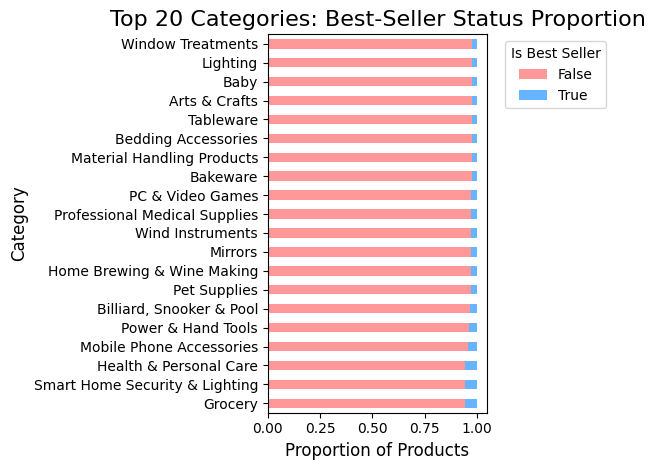

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
import numpy as np

# Load dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Crosstab analysis for product category and bestseller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers in each category
crosstab_prop = crosstab.div(crosstab.sum(axis=1), axis=0)

# Sort by the proportion of best-sellers (True)
sorted_crosstab = crosstab_prop.sort_values(by=True, ascending=False)

# Question: Are there categories where being a best-seller is more prevalent?
# Answer: The categories with a higher proportion of best-sellers appear at the top of the sorted dataframe.
print("Proportion of Best-Sellers by Category (Top 10):\n", sorted_crosstab.head(10))

# Statistical Test: Chi-square test to determine if best-seller distribution is independent of category
chi2, p, dof, expected = chi2_contingency(crosstab)

# Compute Cramér's V to understand the strength of association between best-seller status and category
n = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

# Output Chi-square test result and Cramér's V
print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v}")

# Interpretation:
# If the p-value is < 0.05, we reject the null hypothesis and conclude that there is a significant relationship
# between product categories and bestseller status.
if p < 0.05:
    print("\nConclusion: There is a statistically significant relationship between product categories and bestseller status.")
else:
    print("\nConclusion: There is no statistically significant relationship between product categories and bestseller status.")

# Visualization: Stacked bar chart for best-seller status across top 20 categories
top_categories = sorted_crosstab.head(20)

plt.figure(figsize=(10, 8))
top_categories.plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff'])

plt.title('Top 20 Categories: Best-Seller Status Proportion', fontsize=16)
plt.xlabel('Proportion of Products', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.legend(title='Is Best Seller', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()





Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Number of products after removing outliers: 2115963


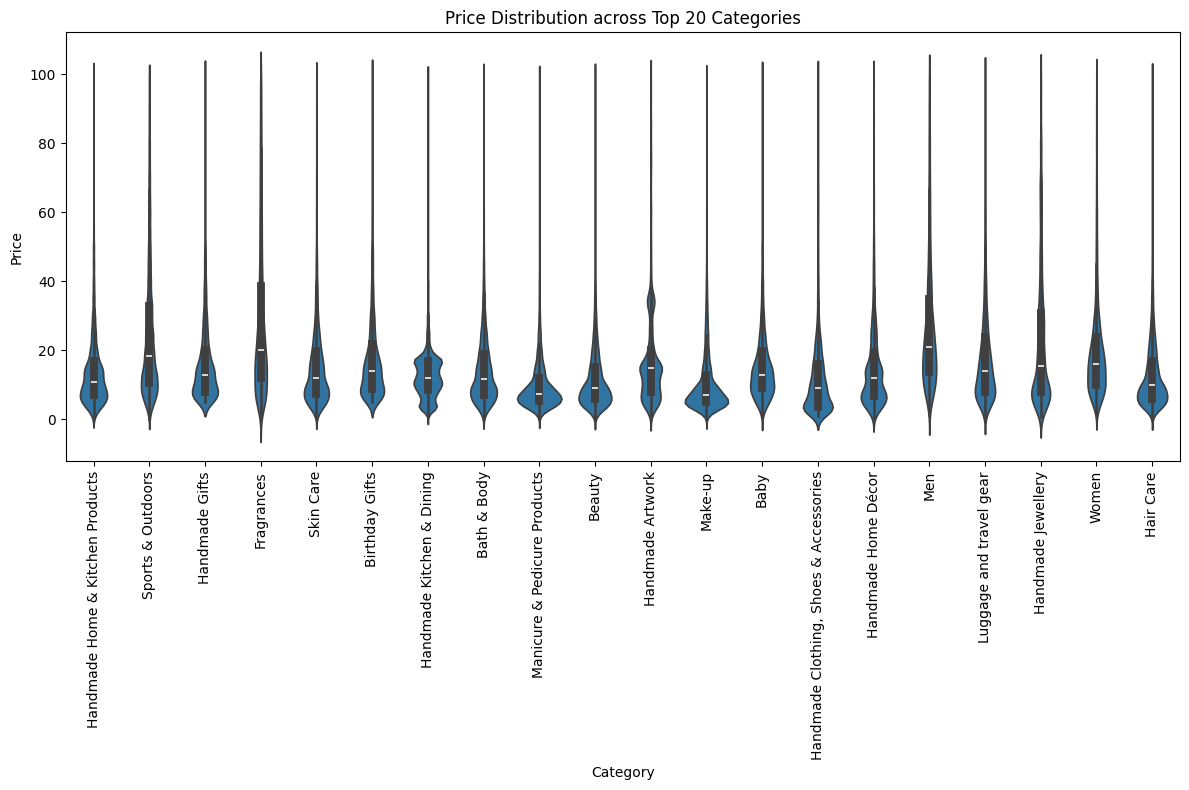

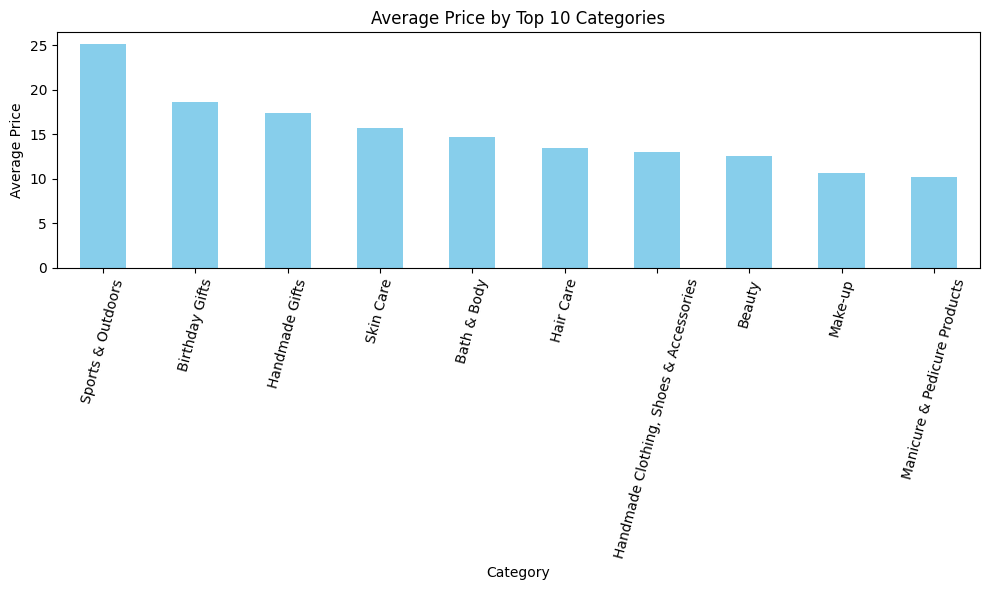

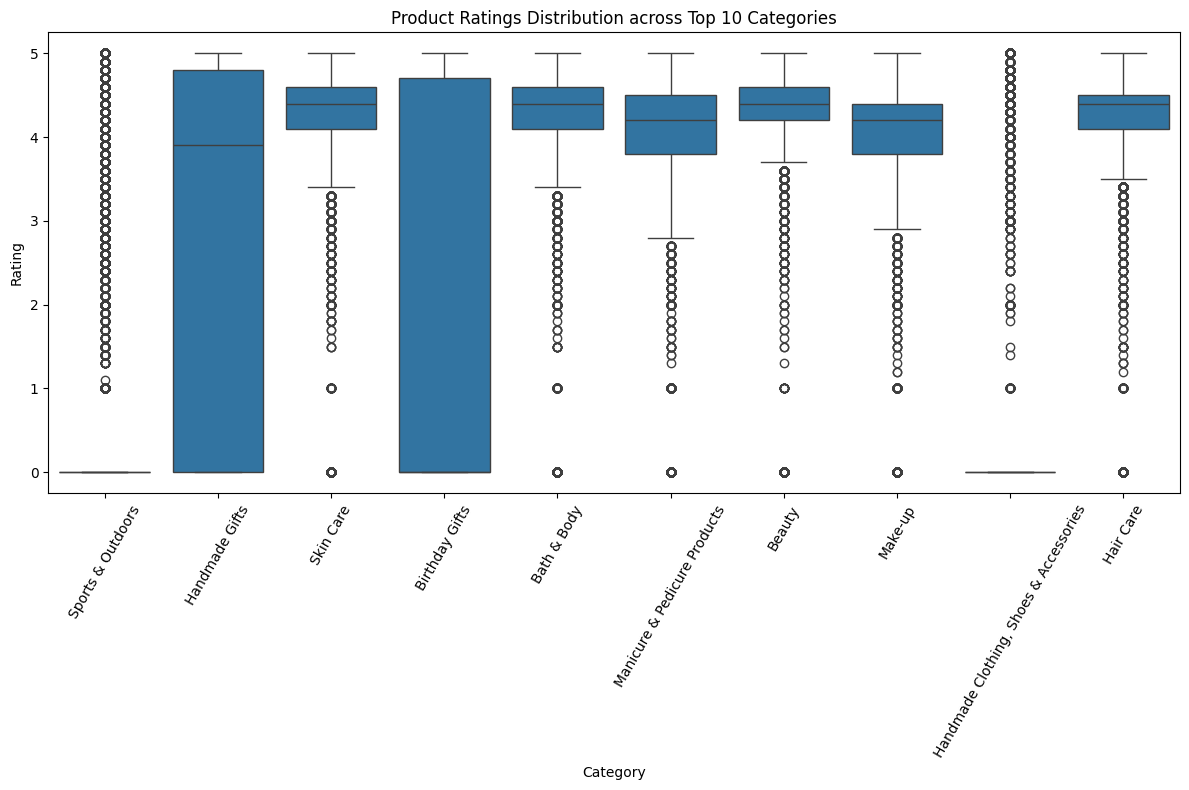

In [12]:
# Step 1: Remove Outliers in Product Prices using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove products outside of IQR bounds
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Print the number of remaining products after removing outliers
print(f"Number of products after removing outliers: {len(df_no_outliers)}")

# Step 2: Violin Plot for Price Distribution across Categories (Top 20 categories by count)
# Get the top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(12, 8))
sns.violinplot(data=df_top_20, x='category', y='price')
plt.xticks(rotation=90)
plt.title('Price Distribution across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Question: Which product category tends to have the highest median price?
# Answer: Based on the violin plot, we can observe which category has the highest median price visually.

# Step 3: Bar Chart for Average Price by Top 10 Categories (by count)
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calculate the average price for each of the top 10 categories
avg_price_by_category = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# Question: Which product category commands the highest average price?
# Answer: Based on the bar chart, we can see which category has the highest average price.

# Step 4: Box Plot for Product Ratings across Categories (Top 10 by count)
# Visualize the distribution of product ratings using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='category', y='stars')
plt.xticks(rotation=60)
plt.title('Product Ratings Distribution across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Question: Which category tends to receive the highest median rating from customers?
# Answer: Based on the box plot, we can observe which category tends to have the highest median rating.

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation coefficient between price and stars: -0.12490673262148386


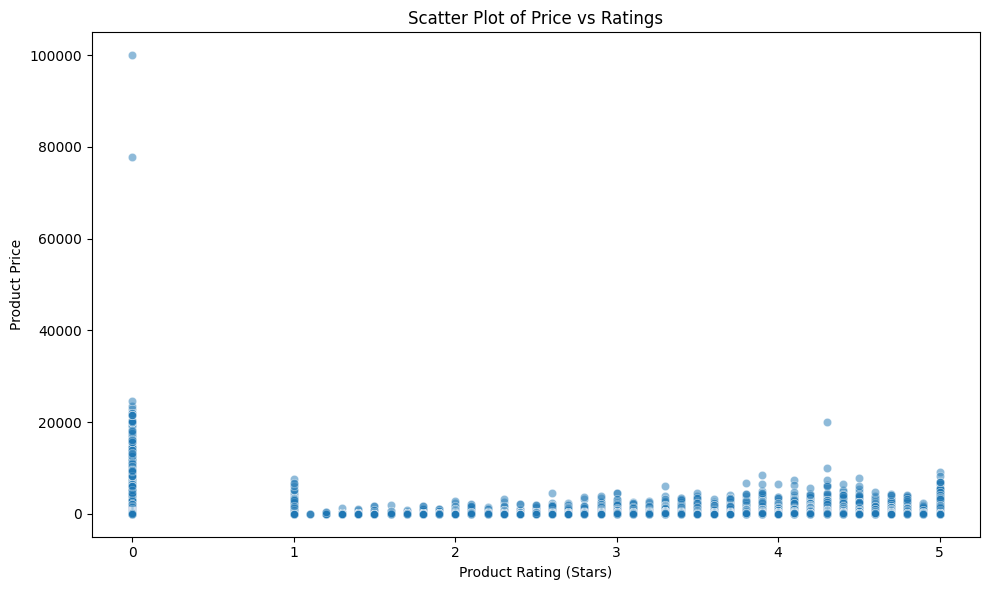

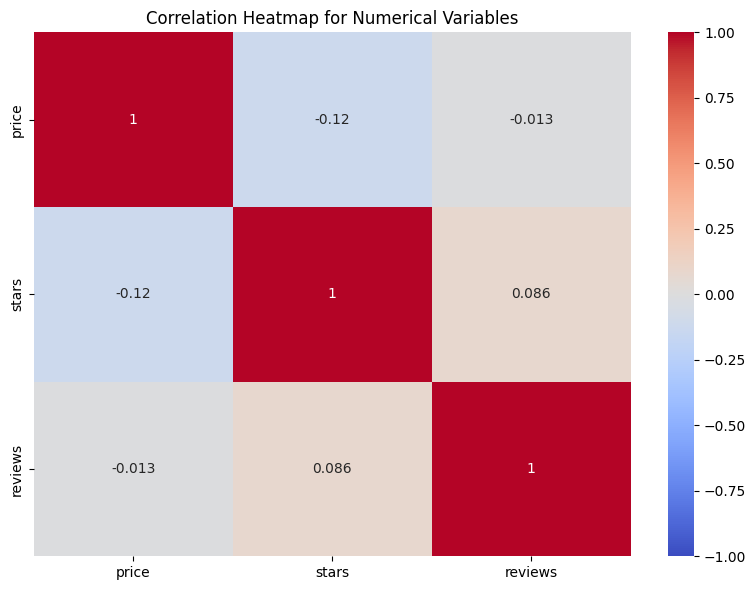

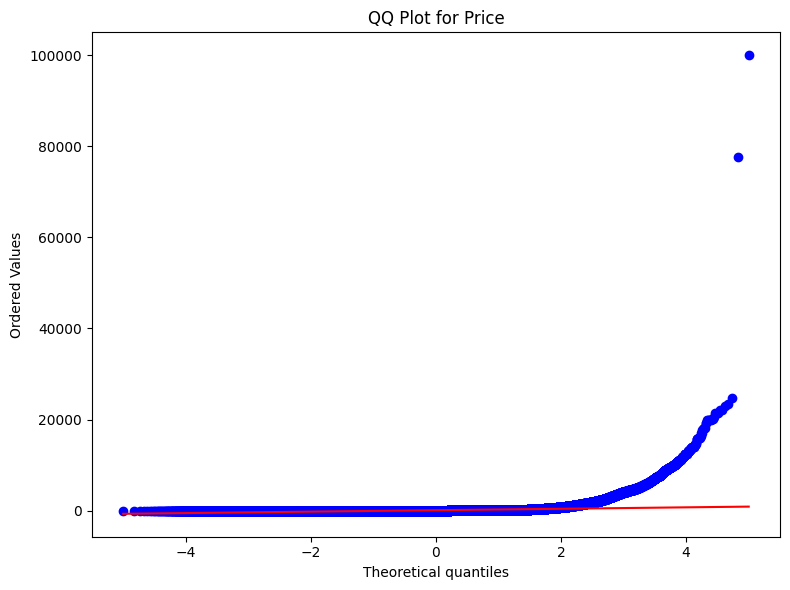

In [13]:
# Step 1: Calculate Correlation Coefficient Between Price and Stars
correlation = df['price'].corr(df['stars'])
print(f"Correlation coefficient between price and stars: {correlation}")

# Question: Is there a significant correlation between product price and its rating?
# Answer: We can assess the significance of the correlation based on the value of the correlation coefficient. A value close to 0 implies no significant correlation, while a value closer to 1 or -1 implies a stronger correlation.

# Step 2: Scatter Plot for Price vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df, alpha=0.5)
plt.title('Scatter Plot of Price vs Ratings')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Product Price')
plt.tight_layout()
plt.show()

# Question: What patterns can you observe from the scatter plot?
# Answer: We can visually assess whether there is a linear relationship or any specific patterns between price and ratings.

# Step 3: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'stars', 'reviews']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Variables')
plt.tight_layout()
plt.show()

# Step 4: QQ Plot for Price
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price')
plt.tight_layout()
plt.show()

# Question: Do product prices follow a normal distribution based on the QQ plot?
# Answer: A QQ plot helps assess whether the prices are normally distributed by comparing their quantiles to the quantiles of a normal distribution. If the points follow a straight line, the data is normally distributed. Deviations from the line suggest non-normality.


**Final Report Conclusions**

- Best-Seller Status and Categories:

The crosstab analysis of the top 20 product categories shows that the majority of products are not best-sellers across most categories. However, a few categories such as Grocery and Smart Home Security & Lighting have a slightly higher proportion of best-sellers, but the difference is minimal. The chi-square test suggests a significant association between product category and best-seller status, but Cramér's V indicates a weak relationship (0.122), suggesting that while the association is significant, it's not very strong.
Product Prices by Category:

- Product Prices by Category:

The bar chart of average product prices highlights that Sports & Outdoors has the highest average price among the top 10 categories. Other categories like Birthday Gifts and Handmade Gifts also have relatively high average prices. This suggests that product categories related to outdoor activities and specialty gifts tend to command higher prices in the market.
Correlation Between Price and Ratings:

- Correlation Between Price and Ratings:

The heatmap visualizing correlations between numerical variables shows a weak negative correlation (-0.12) between price and star ratings, indicating that higher-priced products tend to receive slightly lower ratings on average, but the correlation is not strong enough to draw firm conclusions. Additionally, the QQ plot of prices showed that the price distribution deviates from a normal distribution, likely due to the presence of outliers and high variability in product prices.

*In summary, while there are significant associations between category, price, and best-seller status, the correlations and associations found in the data are generally weak. Categories influence both best-seller status and pricing, but these factors do not seem to have a strong impact on product ratings or customer feedback.*
